# DTW Stocks
#### Lucy Jasso

1. Explicar DTW
2. Bajar datos de yahoo
3. aplicamos retornos- breve explicacion pq retornos
4. DTW resultados
5. Visualizacion de resultados

In [1]:
# Importamos paquetes
import pandas_datareader.data as web 
import datetime   
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import tslearn
from tslearn.utils import to_time_series_dataset
from tslearn.metrics import dtw
from numpy import asarray
from sklearn.preprocessing import StandardScaler

In [2]:
def remove_nan(ts: np.array):
    ts = ts[~np.isnan(ts)]
    return ts.reshape(ts.shape[0], 1)

In [3]:
##Extraemos los tickers de articulo nvidia y Tsla
tickers = ['SPTN','TWNK','GO','NVDA','TSLA']
#solo importan el 2022 para este ejemplo
start = datetime.datetime(2022, 1, 1)
end = datetime.datetime(2022, 11, 30)
df = pd.DataFrame()
#extraemos datos de Yahoo
for ticker in tickers:
    df1 = web.DataReader(ticker, 'yahoo', start, end)
    df[ticker] = df1['Adj Close']
#Agregamos la columna de Date a nuestro dataframe
dates =[]
for x in range(len(df)):
    newdate = str(df.index[x])
    newdate = newdate[0:10]
    dates.append(newdate)
#Renombramos la columna 0 a Date
df.insert(0,'Date', dates)
df.head()

,Date,SPTN,TWNK,GO,NVDA,TSLA
Date,,,,,,
2022-01-03,2022-01-03,25.054459,20.290001,28.559999,301.005585,399.926666
2022-01-04,2022-01-04,25.132814,20.570000,27.850000,292.701233,383.196655
2022-01-05,2022-01-05,25.318913,20.690001,27.309999,275.852692,362.706665
2022-01-06,2022-01-06,25.171993,20.520000,26.830000,281.588776,354.899994
2022-01-07,2022-01-07,25.074047,20.360001,27.900000,272.285095,342.320007


Text(0.5, 1.0, 'Retornos en 2022')

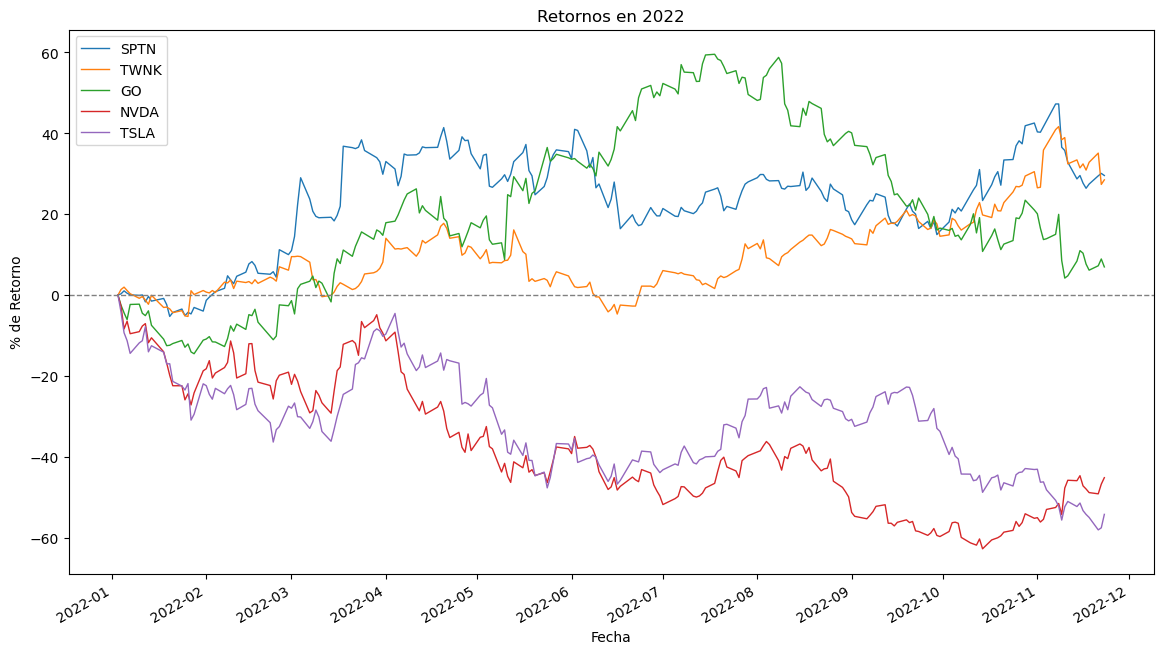

In [4]:
#Hacemos copia de nestro dataframe y removemos la columna Date
new_df = df.copy() 
new_df = new_df.drop(['Date'],axis=1)

# Calculamos retornos para poder visualizar mejor nuestros datos y graficamos
new_df = (new_df - new_df.iloc[0, :])/new_df.iloc[0, :]*100 
new_df.plot(legend=True, figsize=(14, 8), linewidth=1)
plt.axhline(y=0, linestyle='dashed', color='gray', linewidth=1)
plt.xlabel('Fecha')
plt.ylabel('% de Retorno')
plt.title('Retornos en 2022')

In [5]:
# Usamos el mismo df de retornos, nombramos dist y estandarizamos
dist = new_df
dist.head(2)
scaled = StandardScaler().fit_transform(dist)
scaled_df = pd.DataFrame(scaled, index=dist.index, columns=dist.columns)
scaled_df.head(3)

,SPTN,TWNK,GO,NVDA,TSLA
Date,,,,,
2022-01-03,-1.909573,-1.038261,-1.056896,2.353465,2.631697
2022-01-04,-1.883857,-0.899841,-1.179985,2.180168,2.280102
2022-01-05,-1.822781,-0.840518,-1.273602,1.828569,1.849488


,SPTN,TWNK,GO,NVDA,TSLA
0,0.000000,7.320811,7.584129,20.953892,20.354322
1,7.320811,0.000000,14.251632,21.845775,23.615466
2,7.584129,14.251632,0.000000,18.127941,15.497295
3,20.953892,21.845775,18.127941,0.000000,6.244032
4,20.354322,23.615466,15.497295,6.244032,0.000000


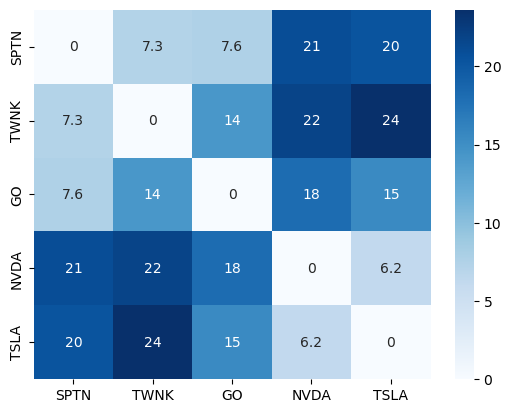

In [6]:
#Computo de DTW
ts_sp = to_time_series_dataset(scaled_df)
dtw_matrix = np.zeros(shape=(5, 5))
for i in range(5):
    for j in range(5):
        distance = dtw(remove_nan(ts_sp[:, i, :]), remove_nan(ts_sp[:, j, :]))
        dtw_matrix[i, j] = distance
distances = pd.DataFrame(dtw_matrix, columns=dist.columns)
display(distances)
ax = sns.heatmap(distances, annot=True, cmap="Blues")
ax.set_yticklabels(distances.columns)
plt.show()

Text(0.5, 1.0, 'Puntaje Similaridad = 6.2')

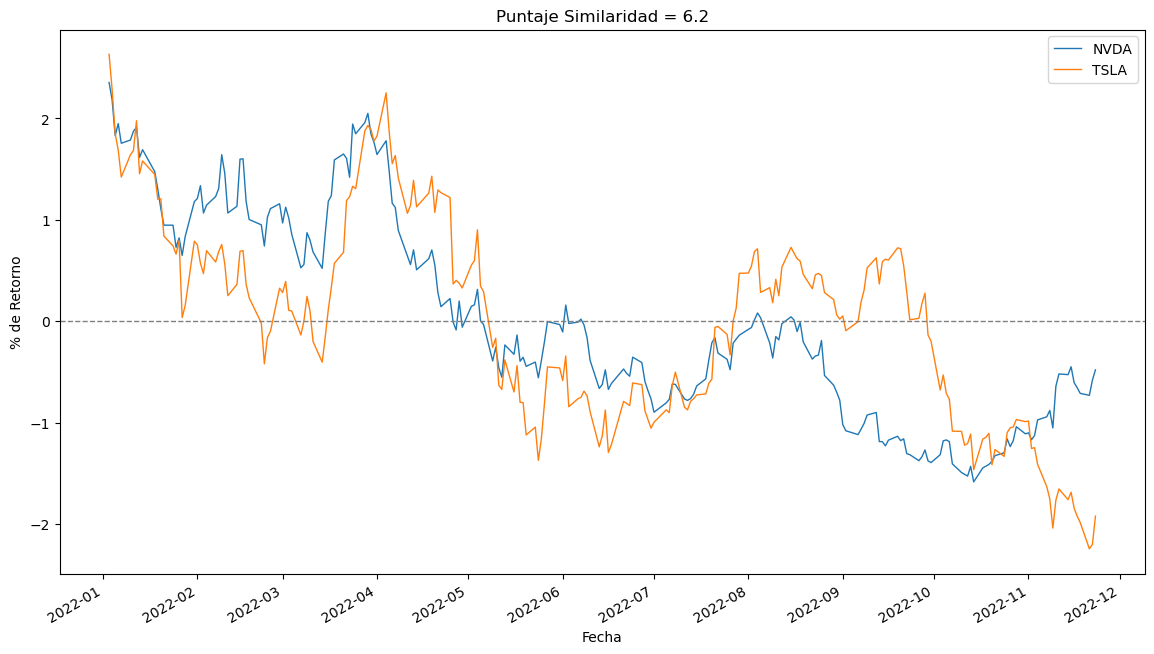

In [12]:
# Ahora veremos el puntaje de similaridad mas bajo(mientras mas bejo mejor)
scaled_df[['NVDA','TSLA']].plot(legend=True, figsize=(14, 8), linewidth=1)
plt.axhline(y=0, linestyle='dashed', color='gray', linewidth=1)
plt.xlabel('Fecha')
plt.ylabel('% de Retorno')
plt.title('Puntaje Similaridad = 6.2')

Text(0.5, 1.0, 'Puntaje Similaridad = 7.3')

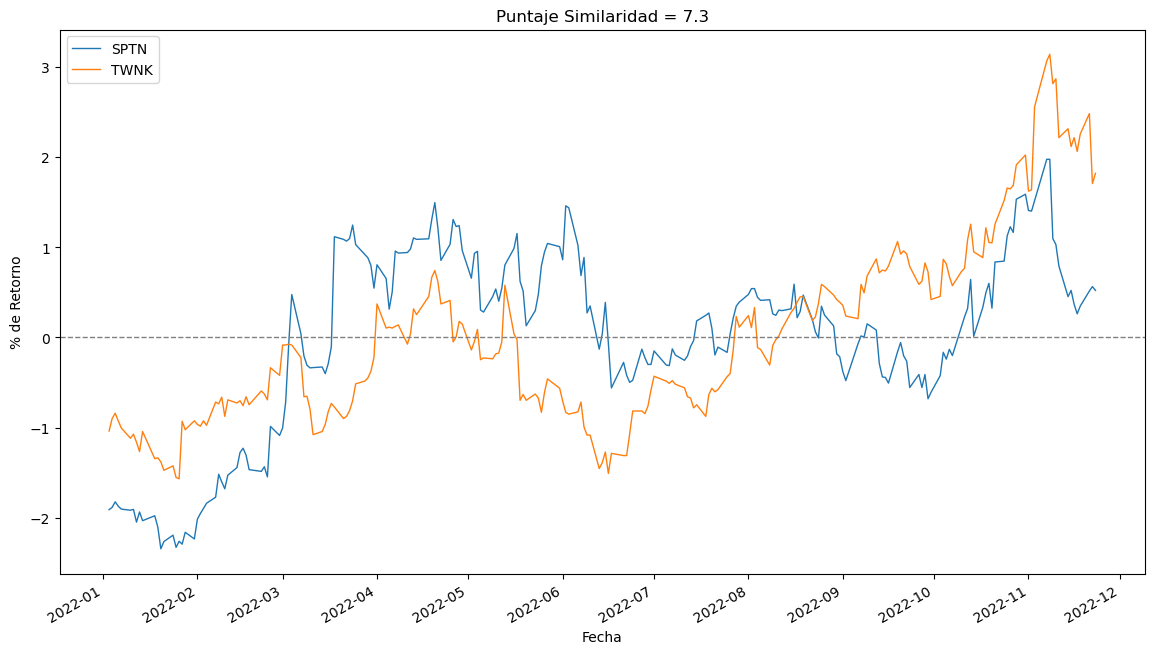

In [13]:
# Ahora veremos la industria de alimentos SPTN vs TWNK que su puntaje de similaridad es bajo( muy parecidos)
scaled_df[['SPTN','TWNK']].plot(legend=True, figsize=(14, 8), linewidth=1)
plt.axhline(y=0, linestyle='dashed', color='gray', linewidth=1)
plt.xlabel('Fecha')
plt.ylabel('% de Retorno')
plt.title('Puntaje Similaridad = 7.3')

Text(0.5, 1.0, 'Puntaje Similaridad = 24')

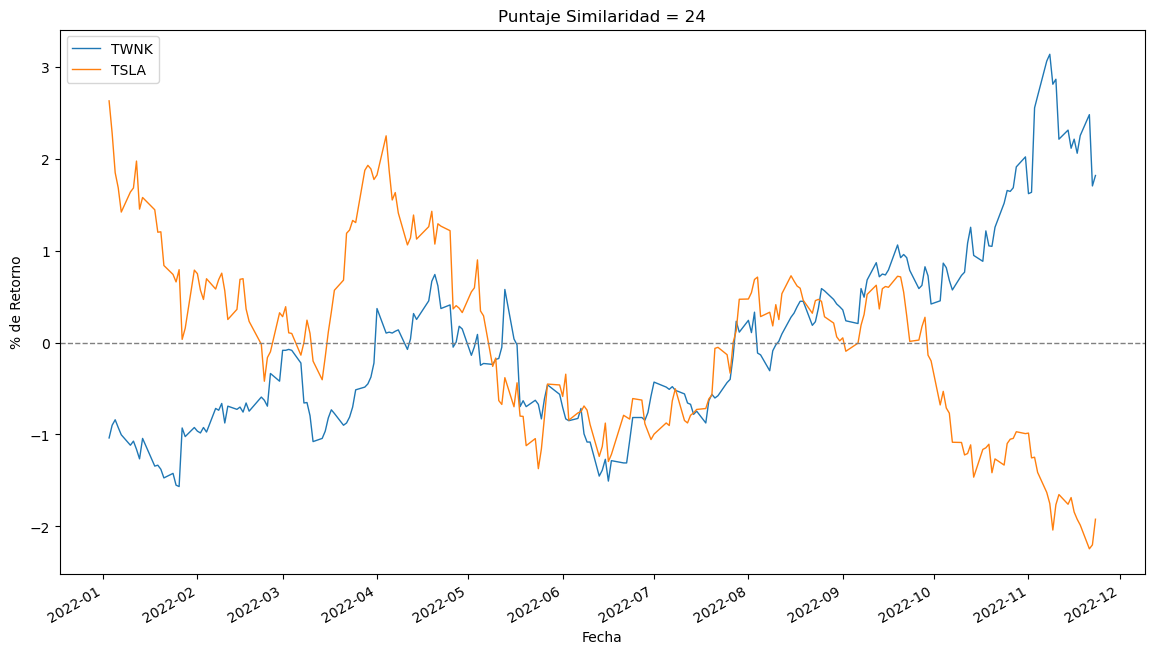

In [14]:
# Basandonos en los stocks con menor similaridad tenemos a TWNK y NVDA
scaled_df[['TWNK','TSLA']].plot(legend=True, figsize=(14, 8), linewidth=1)
plt.axhline(y=0, linestyle='dashed', color='gray', linewidth=1)
plt.xlabel('Fecha')
plt.ylabel('% de Retorno')
plt.title('Puntaje Similaridad = 24')